In [1]:
!pip install openslide-python

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import multiresolutionimageinterface as mir
import matplotlib.pyplot as plt
import numpy as np

from skimage import filters
from skimage.color import rgb2gray
from tqdm import tqdm_notebook as tqdm

In [3]:
import sys
sys.path.append('../../deep-histopath/')

In [4]:
from deephistopath.wsi import filter

In [5]:
reader = mir.MultiResolutionImageReader()

In [6]:
mr_image = reader.open('../inputs/tumor_001.tif')
mask = reader.open('../inputs/mask_001.tif')

In [7]:
x, y = mr_image.getLevelDimensions(0)
x = x // 256
y = y // 256

In [8]:
mr_image.getLevelDimensions(0)

(97792, 221184)

In [9]:
mr_l8_gray = rgb2gray(mr_image.getUCharPatch(0, 0, x , y, 8))

In [10]:
img = mr_image.getUCharPatch(0, 0, x , y, 8)

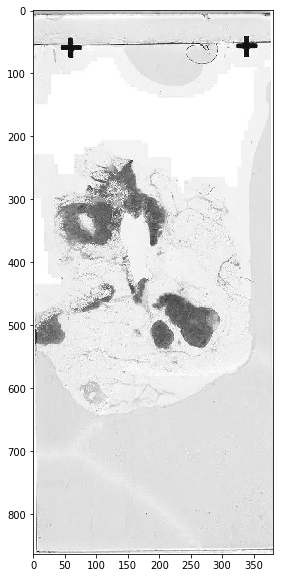

In [11]:
plt.figure(figsize=(5, 10))
plt.imshow(mr_l8_gray, cmap='gray')
plt.show()

In [12]:
filtered_img = rgb2gray(filter.apply_image_filters(img))

Mask percentage 90.74% >= overmask threshold 90.00% for Remove Green Channel green_thresh=200, so try 228
Filter Green Channel | Time: 0:00:00.001156  Type: bool    Shape: (864, 382)
Filter Green Channel | Time: 0:00:00.003042  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.000887  Type: uint8   Shape: (864, 382, 3)
Filter Grays         | Time: 0:00:00.006074  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.000872  Type: uint8   Shape: (864, 382, 3)
Filter Red Pen       | Time: 0:00:00.010334  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.000868  Type: uint8   Shape: (864, 382, 3)
Filter Green Pen     | Time: 0:00:00.015405  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.000946  Type: uint8   Shape: (864, 382, 3)
Filter Blue Pen      | Time: 0:00:00.014060  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.000925  Type: uint8   Shape: (864, 382, 3)
Mask RGB             | Time: 0:0

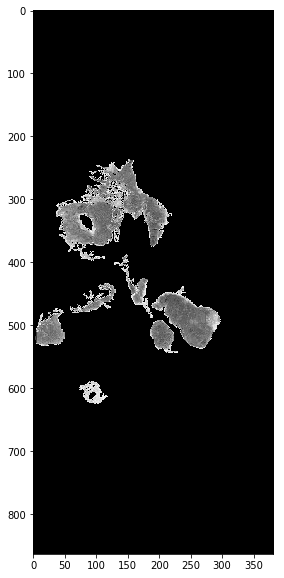

In [13]:
plt.figure(figsize=(5, 10))

plt.imshow(filtered_img, cmap='gray')

plt.show()

In [14]:
mr_l8_gray.shape

(864, 382)

In [15]:
patches = []
labels = []

patch_x = 256
patch_y = 256

for i in tqdm(range(0, x)):
    for j in range(0, y):
        if filtered_img[j, i] == 0:
            continue
        
        mask_patch = mask.getUCharPatch(i * 256, j * 256, 256, 256, 0)
        mr_patch = mr_image.getUCharPatch(i * 256, j * 256, 256, 256, 0)
        
        if np.sum(mask_patch) > 0:
            patches.append(mr_patch)
            labels.append(1)
        else:
            continue
            patches.append(mr_patch)
            labels.append(0)
        
        if (len(labels) > 1):
            break
            
    if (len(labels) > 1):
        break

In [60]:
mask_patch.shape

(256, 256, 1)

In [59]:
labels

[]

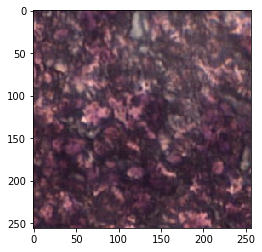

In [51]:
plt.imshow(patches[10])

In [55]:
np.sum(mask)

<multiresolutionimageinterface.MultiResolutionImage; proxy of <Swig Object of type 'std::shared_ptr< MultiResolutionImage > *' at 0x7f182eadeae0> >

In [34]:
filter.tissue_percent(patches[400])

99.5330810546875

In [122]:
np.sum(labels)

0

In [80]:
mr_l8_gray > otsu_thre

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [83]:
np.sum(mr_l8_gray > otsu_thre)

306409